In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import numpy as np
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dir_train = '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train'
dir_test = '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test'

In [3]:
image_size = (64,64)
batch_size = 128
num_classes = 65

In [4]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    dir_train,
    validation_split = 0.18,
    subset = "both",
    seed = 82,
    image_size = image_size,
    batch_size = batch_size,
    
)

Found 42559 files belonging to 65 classes.
Using 34899 files for training.
Using 7660 files for validation.


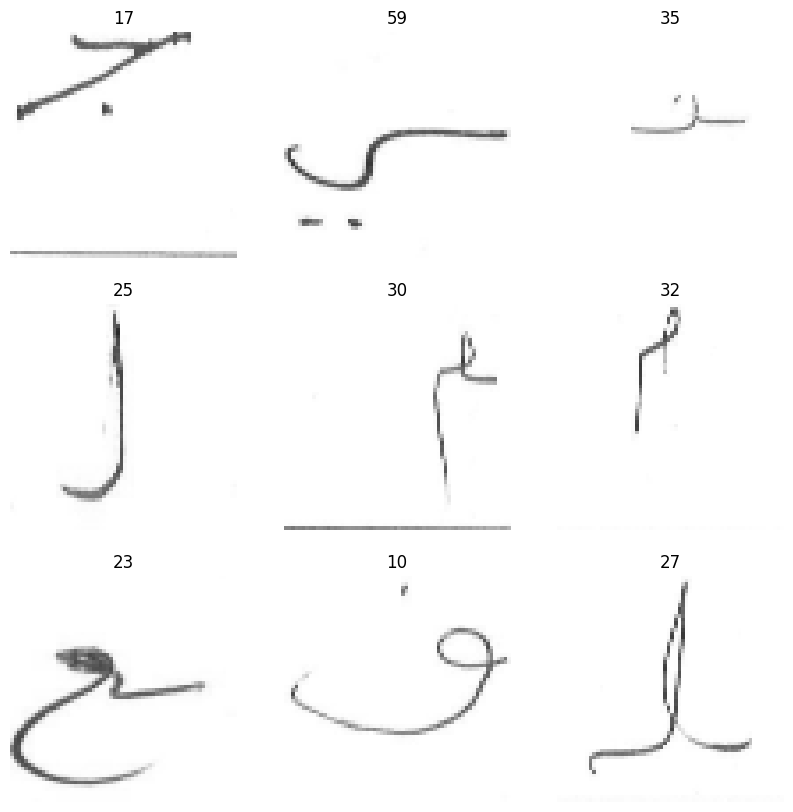

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
# model = keras.Sequential(
#     [
#         layers.Rescaling(1.0/255),
#         keras.Input(shape = (num_classes,num_classes,1)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding = "same"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dense(num_classes, activation='softmax'),
        
#     ]
# )

model = keras.Sequential(
    [
        layers.Rescaling(1.0/255),
        keras.Input(shape=(num_classes,num_classes,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



In [7]:
model.build(input_shape=(None, 64, 64, 3))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [9]:


# model.compile(
#     optimizer=keras.optimizers.Adam(3e-4),
#     loss=keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=[keras.metrics.BinaryAccuracy(name="acc")],
# )
# stat = model.fit(
#     train_ds,
#     epochs=10,
#     validation_data=val_ds,
# )
batch_size = 128
epochs = 40

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

plooot = model.fit(train_ds, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_data=val_ds
         )

Epoch 1/40
273/273 [==============================] - 72s 211ms/step - loss: 3.8400 - accuracy: 0.0942 - val_loss: 3.3820 - val_accuracy: 0.1692
Epoch 2/40
273/273 [==============================] - 20s 70ms/step - loss: 2.9761 - accuracy: 0.2564 - val_loss: 2.8477 - val_accuracy: 0.2992
Epoch 3/40
273/273 [==============================] - 21s 74ms/step - loss: 2.5755 - accuracy: 0.3399 - val_loss: 2.4980 - val_accuracy: 0.3721
Epoch 4/40
273/273 [==============================] - 20s 72ms/step - loss: 2.3119 - accuracy: 0.3944 - val_loss: 2.3182 - val_accuracy: 0.4039
Epoch 5/40
273/273 [==============================] - 19s 69ms/step - loss: 2.1264 - accuracy: 0.4349 - val_loss: 2.1887 - val_accuracy: 0.4364
Epoch 6/40
273/273 [==============================] - 20s 71ms/step - loss: 1.9814 - accuracy: 0.4690 - val_loss: 2.0826 - val_accuracy: 0.4614
Epoch 7/40
273/273 [==============================] - 21s 75ms/step - loss: 1.8417 - accuracy: 0.5016 - val_loss: 2.0787 - val_accuracy

In [13]:
test = keras.utils.image_dataset_from_directory(
    dir_test,
    labels=None,
    label_mode="categorical",
    shuffle=False,
    image_size = image_size,
    #batch_size = batch_size,
    
)

Found 10640 files belonging to 1 classes.


In [14]:
predictions = model.predict(test)

333/333 [==============================] - 19s 57ms/step


In [55]:
images = os.listdir(dir_test)

In [56]:
labels_list = sorted(os.listdir(dir_train))

In [57]:
dataframe = pd.DataFrame(columns=['ID', 'Label'], dtype='int32')
predicted_classes = np.argmax(predictions, axis=1)

dataframe = pd.DataFrame(
    [[int(image.split(".")[0]), int(labels_list[class_i])]
     for image, class_i in zip(sorted(images), predicted_classes)],
    columns=['ID', 'Label']
)

In [58]:
dataframe.sort_values(by='ID',inplace = True)

In [59]:
dataframe.to_csv('results4.csv', index=False, header=True)